WIKILAB https://eeglab.org

BOOK: An Introduction to the Event-Related Potential Technique, Second Edition


In [102]:

import scipy.io as sio
import matplotlib.pyplot as plt

In [592]:
# Loading the .mat file
data = sio.loadmat("/Users/minolidissanayake/Desktop/Keele/Modules/SEM 3/Dataset/ADHD_part2/v288.mat")  

# Access the EEG data
eeg_data = data['v288']

# Print the shape of the EEG data
print(f"Shape of eeg_data: {eeg_data.shape}")

# Transpose the data to get (channels, time_samples) if necessary
if eeg_data.shape[0] > 1000:  # assuming more rows means time samples
    eeg_data = eeg_data.T

# Check the new shape
print(f"New shape of eeg_data: {eeg_data.shape}")

# Number of channels and time samples
n_channels = eeg_data.shape[0]
n_time_samples = eeg_data.shape[1]

print(f"Channels: {n_channels}, Time samples: {n_time_samples}")



Shape of eeg_data: (20115, 19)
New shape of eeg_data: (19, 20115)
Channels: 19, Time samples: 20115


In [593]:
#Process EEG data using MNE library
import mne

#MNE information object creation
sampling_rate = 256  # sampling rate of your data
info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(n_channels)],
                       sfreq=sampling_rate,
                       ch_types='eeg')


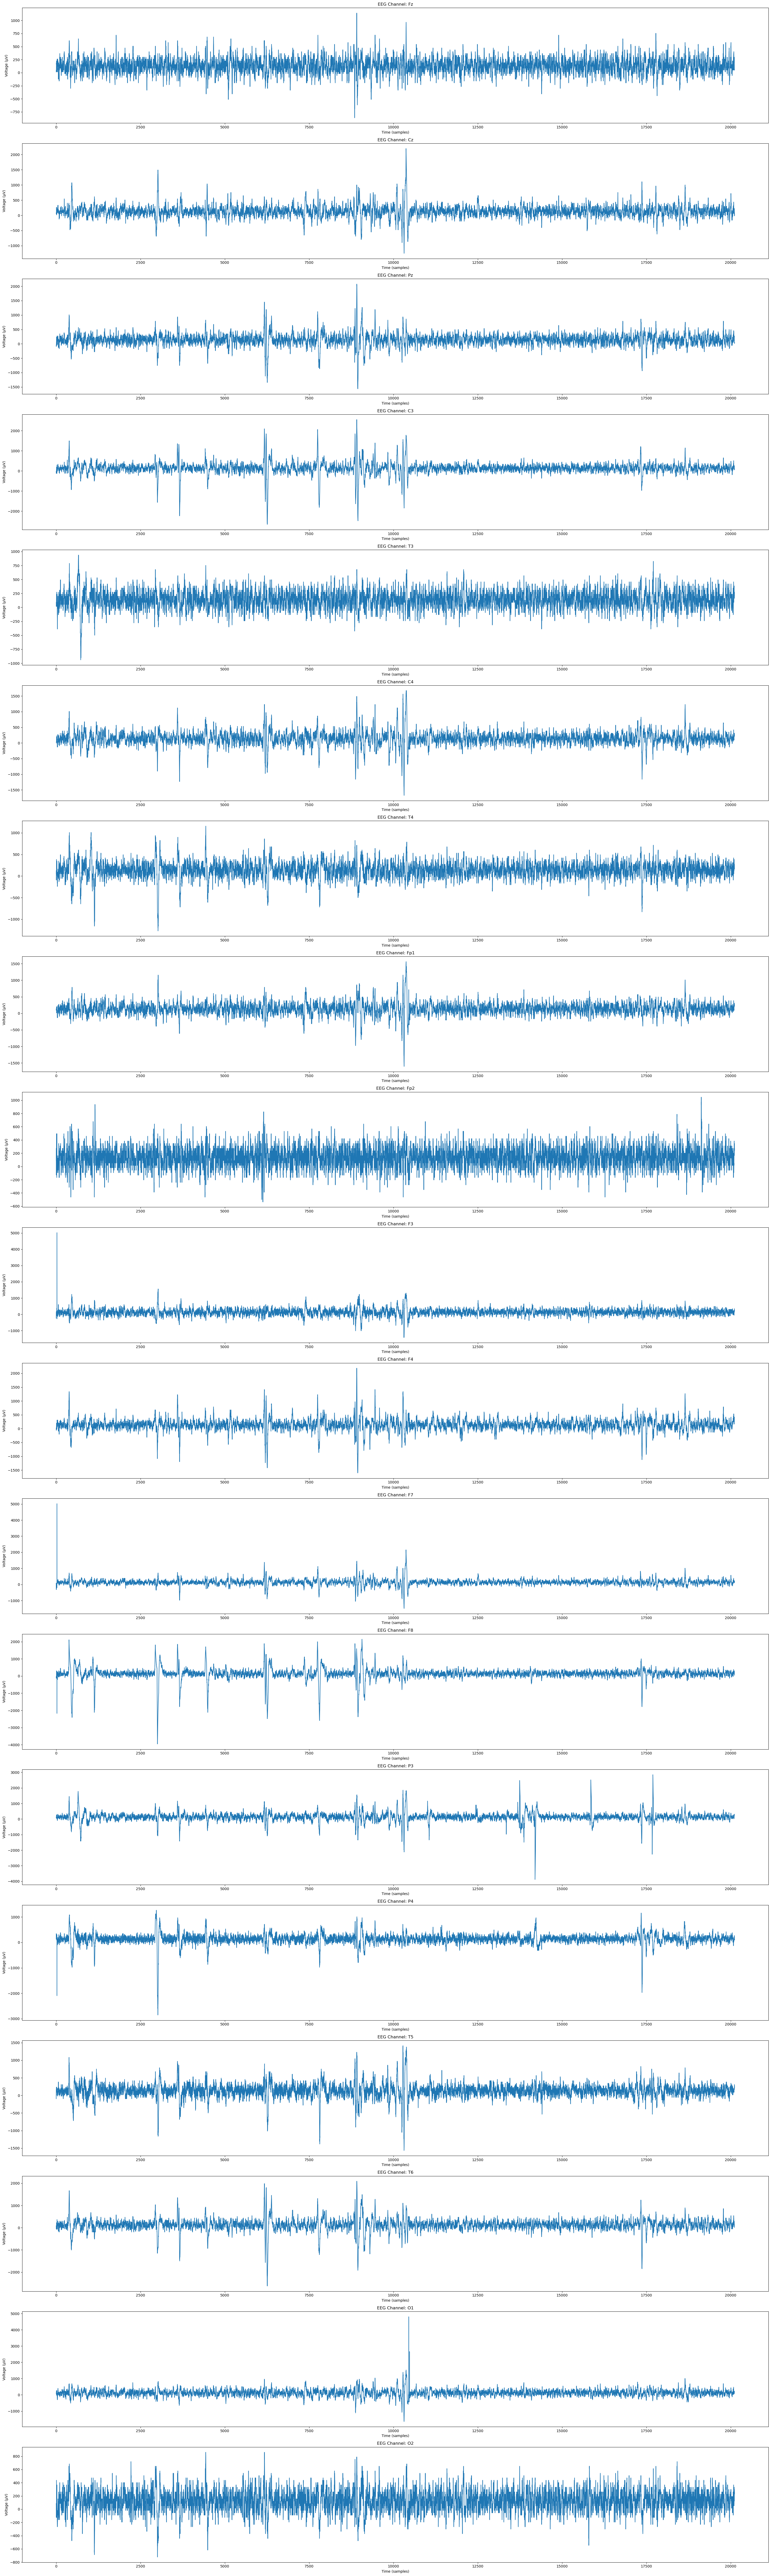

Creating RawArray with float64 data, n_channels=19, n_times=20115
    Range : 0 ... 20114 =      0.000 ...    78.570 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 48.00 Hz
- Upper transition bandwidth: 12.00 Hz (-6 dB cutoff frequency: 54.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


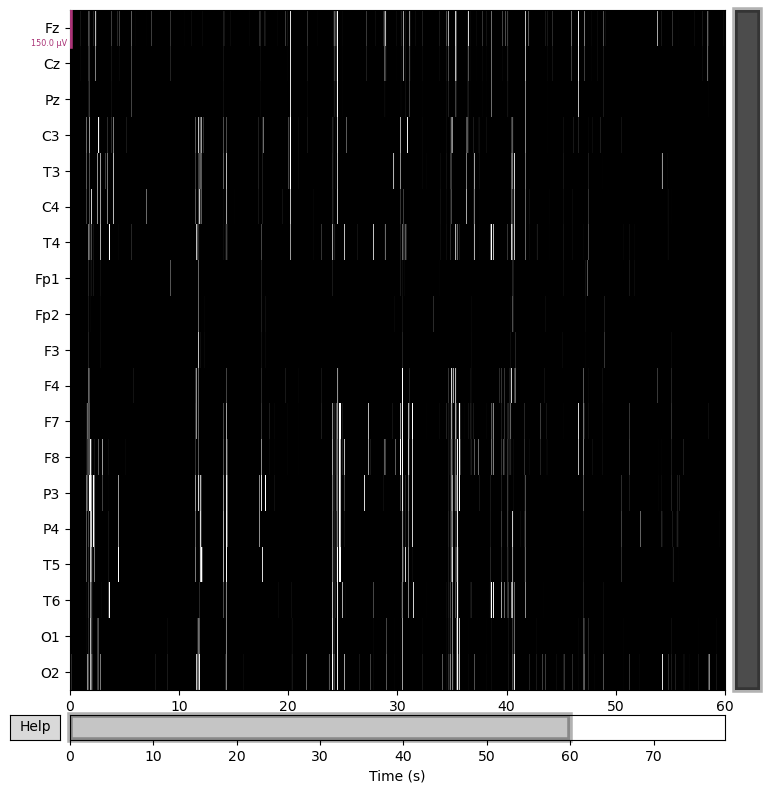

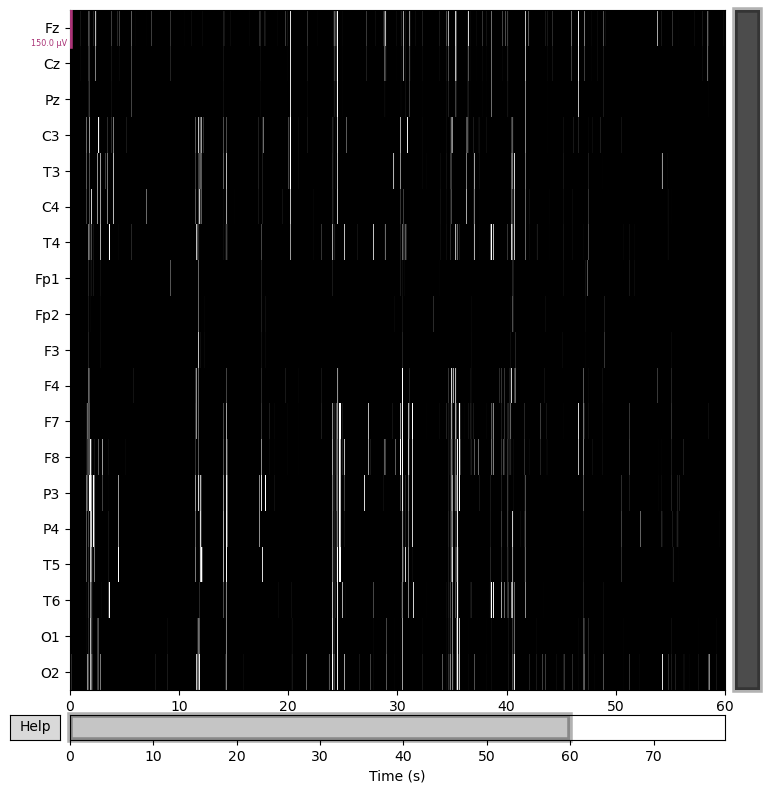

In [594]:
# Channel names
channel_names = [
    'Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2',
    'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2'
]

# Ensure the length of channel names matches the number of channels
if len(channel_names) != n_channels:
    raise ValueError(f"Channel names list length ({len(channel_names)}) does not match the number of channels in EEG data ({n_channels}).")

import matplotlib.pyplot as plt
import numpy as np

# Plot all channels using matplotlib
plt.figure(figsize=(30, 100))
time = np.arange(n_time_samples)  # Time axis for plotting

for i in range(n_channels):
    plt.subplot(n_channels, 1, i + 1)
    plt.plot(time, eeg_data[i, :])  # Plot each channel
    plt.title(f'EEG Channel: {channel_names[i]}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Voltage (μV)')

plt.tight_layout()
plt.show()

import mne

# Create the MNE Info object
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types='eeg')

# Create RawArray object
raw = mne.io.RawArray(eeg_data, info)

# Apply a bandpass filter
raw.filter(l_freq=1.0, h_freq=48.0)

# Plot with MNE
raw.plot(duration=60.0, scalings={'eeg': 75e-6}, n_channels=19)




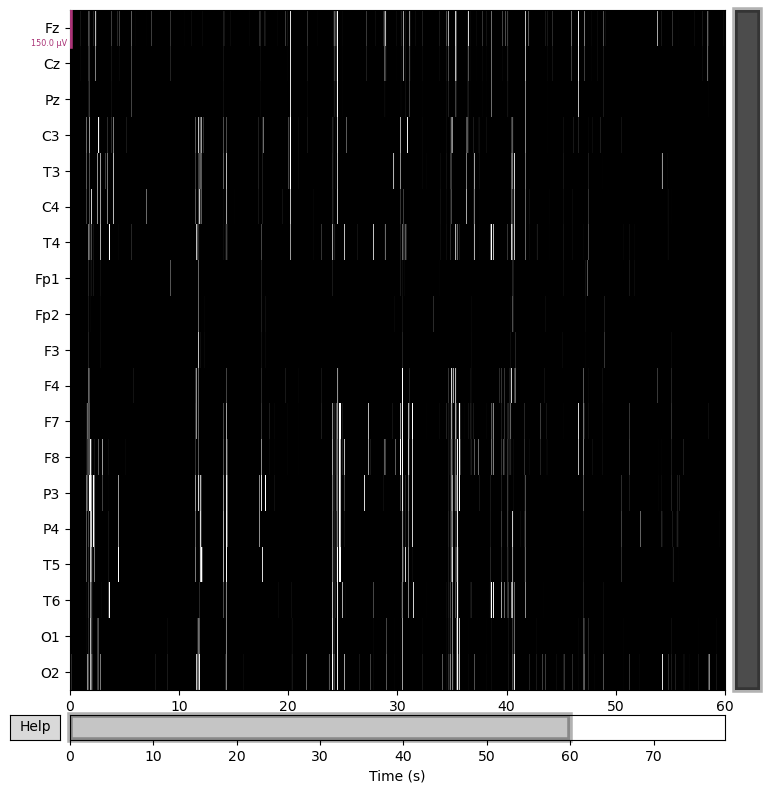

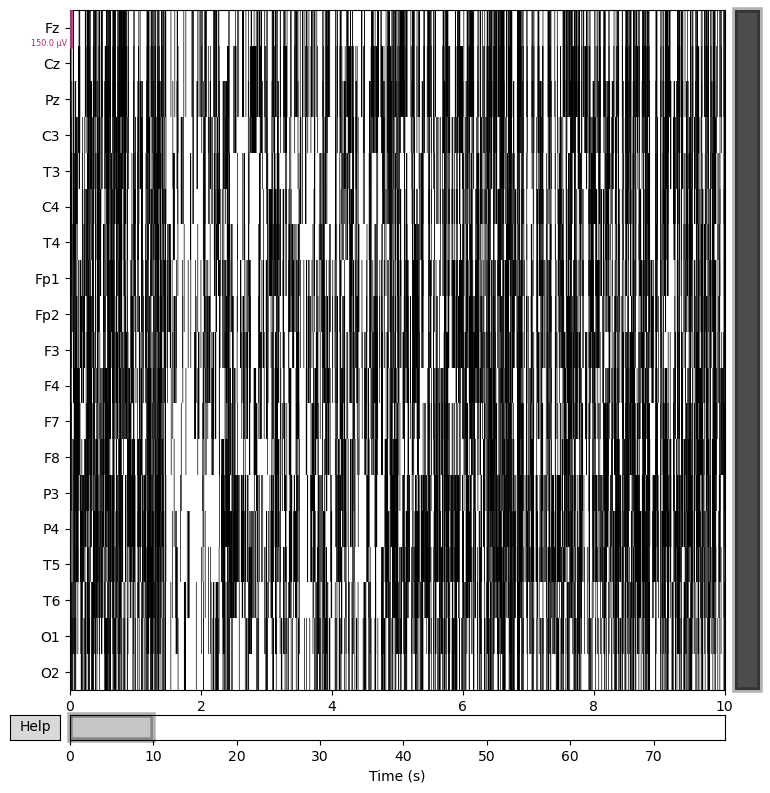

TypeError: BaseRaw.plot() got an unexpected keyword argument 'stop'

In [595]:
# Example: Adjusting duration and scaling
raw.plot(duration=60.0, scalings={'eeg': 75e-6}, n_channels=n_channels)

raw.plot(duration=10.0, scalings={'eeg': 75e-6}, n_channels=n_channels, block=True, show_scrollbars=True)

# Plotting a segment of the data
start, stop = raw.time_as_index([50, 100])  
raw.plot(duration=10.0, scalings={'eeg': 75e-6}, n_channels=n_channels, start=start, stop=stop)

# Create an Epochs object if you have events
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, event_id=None, tmin=-0.2, tmax=0.5, baseline=(None, 0), detrend=1)

# Plot epochs
epochs.plot()

# Save the plot as an image file
raw.plot(duration=10.0, scalings={'eeg': 1e-6}, n_channels=n_channels, block=False)
plt.savefig('eeg_plot.png')






Creating RawArray with float64 data, n_channels=19, n_times=12500
    Range : 0 ... 12499 =      0.000 ...    48.824 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 48.00 Hz: -6.02, -6.02 dB



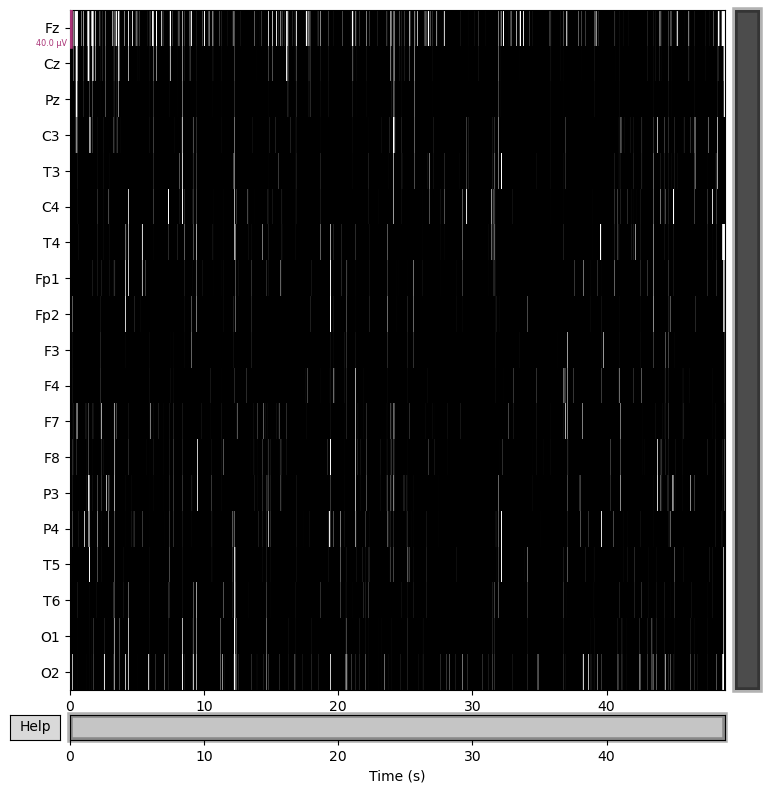

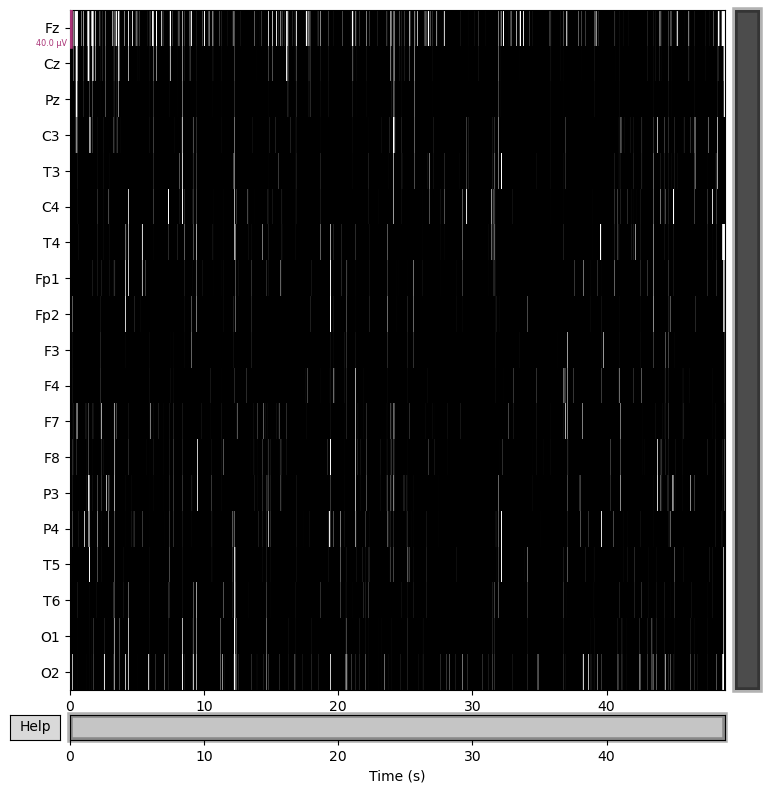

In [ ]:
#creating raw mne object
raw = mne.io.RawArray(eeg_data, info)

#Applying a bandpass filter as performed in the study from 1Hz to 48Hz
raw.filter(1, 48, method='iir')

#Plot
raw.plot(duration=60.0, scalings={'eeg': 20e-6}, n_channels=19)
